In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import ShuffleSplit

import pymc3 as pm

import matplotlib.pyplot as plt

from modules.neural_networks import BayesianMLP

In [3]:
X, y = load_boston(return_X_y=True)

for tr_i, ts_i in ShuffleSplit(n_splits=1).split(X, y):
    
    X_tr, X_ts = X[tr_i], X[ts_i]
    y_tr, y_ts = y[tr_i], y[ts_i]
    
    scaler = MinMaxScaler()
    scaler.fit(X_tr)
    X_tr = scaler.transform(X_tr)
    X_ts = scaler.transform(X_ts)

# Gaussian Likelyhood

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])
C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


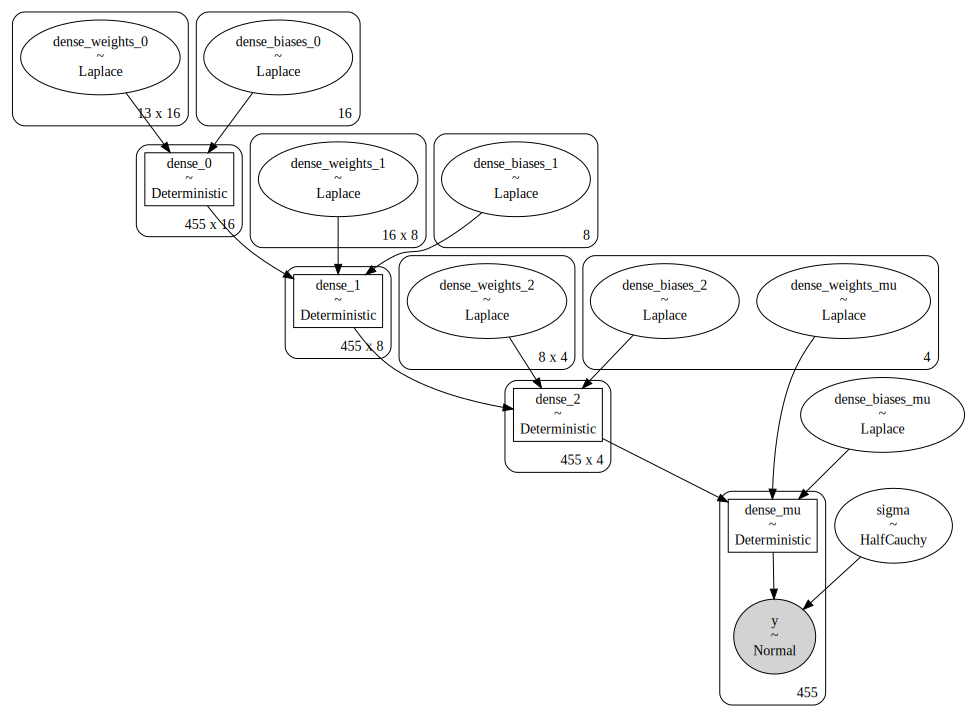

In [4]:
gaussian_perceptron = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='gaussian_lk',
    layers=(16, 8, 4), 
    activation='tanh',
    batch_size=16,
    prior=pm.Laplace,
    mu=0,
    b=1
)
gaussian_perceptron.show_graph()

In [5]:
gaussian_perceptron.fit(n=500000)
gaussian_traces = gaussian_perceptron.predict(
    X_ts, 
    y_ts,
)

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\theano\gpuarray\dnn.py:192: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn(


Finished [100%]: Average Loss = 60.626


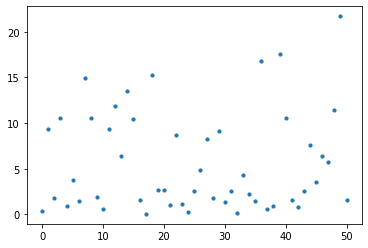

In [12]:
plt.scatter([i for i in range(len(y_ts))], abs(gaussian_traces['y'].mean(0).flatten() - y_ts), s=10)

# Student-t Likelyhood

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


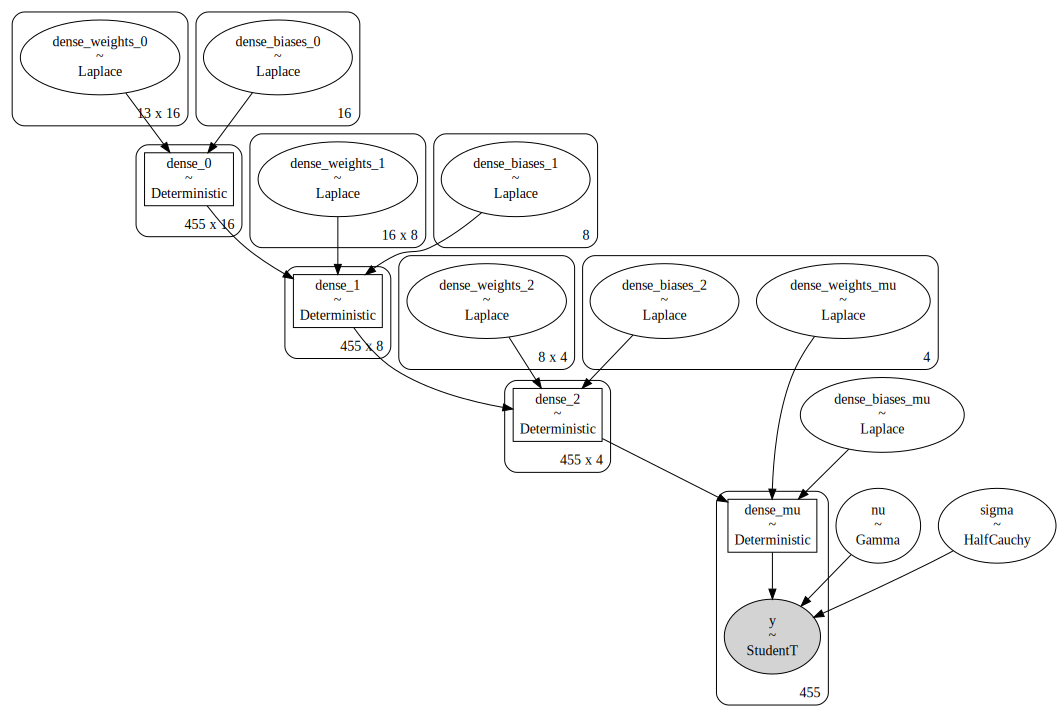

In [13]:
student_perceptron = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='student_lk',
    layers=(16, 8, 4), 
    activation='tanh',
    batch_size=16,
    prior=pm.Laplace,
    mu=0,
    b=1
)
student_perceptron.show_graph()

In [14]:
student_perceptron.fit(n=500000)
student_traces = student_perceptron.predict(
    X_ts, 
    y_ts, 
    ['y']
)

Finished [100%]: Average Loss = 59.914


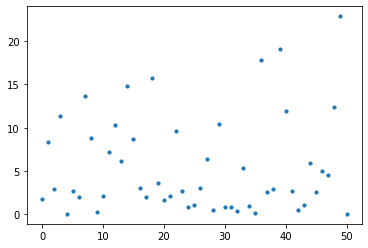

In [15]:
plt.scatter(
    [i for i in range(len(y_ts))], 
    abs(student_traces['y'].mean(0).flatten() - y_ts), 
    s=10
)

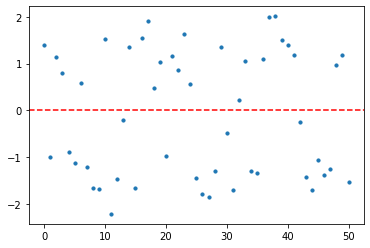

In [16]:
x = abs(student_traces['y'].mean(0).flatten() - y_ts) - abs(gaussian_traces['y'].mean(0).flatten() - y_ts)
plt.scatter([i for i in range(len(y_ts))], x, s=10)
plt.axhline(0, linestyle='--', c='r')